In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
data=pd.read_csv("laser_doble.csv")

In [4]:
data.head()

,Posicion (mm),Voltaje (V)
0,10.0,0.543
1,9.9,0.467
2,9.8,0.370
3,9.7,0.262
4,9.6,0.163


In [5]:
#Se definen las incertidumbres experimentales de los datos
dv=0.001
dy=0.01

In [6]:
# Se calculan los ángulos
L=50.5*10.0 #Longitud entre distancia y pantalla
dtheta=dy/L

data=data.loc[10:]

#Centramos con respecto a 0
data['Posicion (mm)']=data['Posicion (mm)']-data['Posicion (mm)'][np.argmax(data['Voltaje (V)'])]

#Corregimos los datos con el offset de 0.011 V
data['Voltaje (V)']=data['Voltaje (V)']-0.011

#Agregamos el angulo al dataframe
data['Theta (rad)']=pd.Series(np.arctan(data['Posicion (mm)']/L),index=data.index)

In [7]:
data.head()

,Posicion (mm),Voltaje (V),Theta (rad)
10,4.4,0.009,0.008713
11,4.3,0.009,0.008515
12,4.2,0.011,0.008317
13,4.1,0.019,0.008119
14,4.0,0.032,0.007921


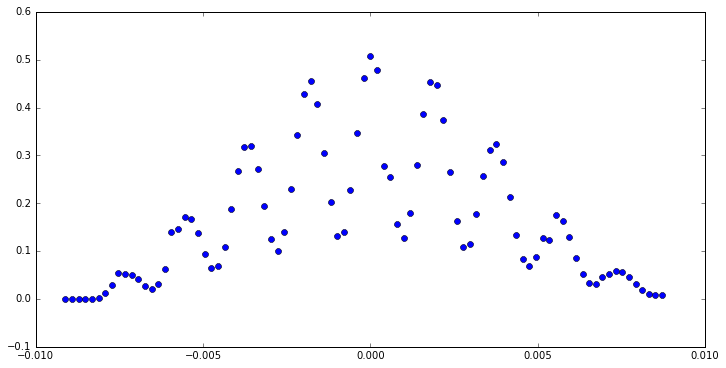

In [8]:
# Visualizamos los datos
fig=plt.figure(figsize=(12,6))
plt.errorbar(data['Theta (rad)'],data['Voltaje (V)'],xerr=dtheta,yerr=dv,fmt='o')
plt.show()

In [9]:
# Recortamos los primeros 10 datos anómalos
data1=data

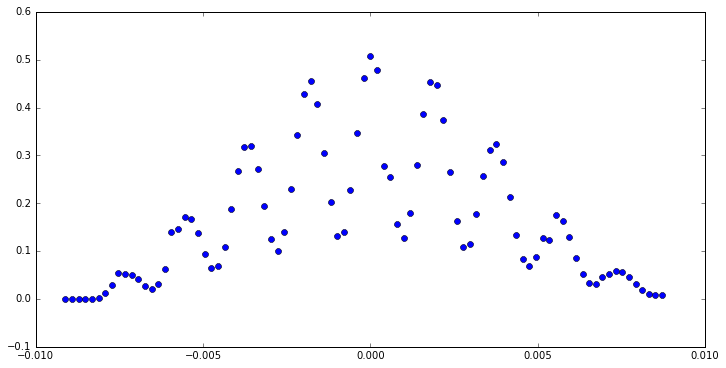

In [10]:
# Visualizamos los datos
fig=plt.figure(figsize=(12,6))
plt.errorbar(data1['Theta (rad)'],data1['Voltaje (V)'],xerr=dtheta,yerr=dv,fmt='o')
plt.show()

In [11]:
# Definimos las funciones que nos dan la intensidad según Fraunhofer
def I_doble(thet,I0):
    lam=0.00067
    d=0.357
    a=0.08
    sinth=np.sin(thet)
    i1=np.square(np.cos((np.pi*d/lam)*sinth))
    div=np.divide(np.sin((np.pi*a/lam)*sinth),(np.pi*a/lam)*sinth)
    i2=np.square(div)
    ff=I0*i1*i2
    return ff

100
0.612121212121


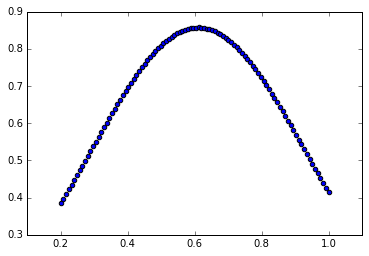

In [12]:
yobs=data1['Voltaje (V)']

i0_space=np.linspace(0.2,1,100)

print(len(i0_space))
squareerror=[]

for i in i0_space:
    ymodel=I_doble(data1['Theta (rad)'],i)
    msei=np.exp(-0.5*np.sum((ymodel-yobs)**2))
    squareerror.append(msei)

i0_opt=i0_space[np.argmax(squareerror)]
print(i0_opt)
fig=plt.figure()
plt.scatter(i0_space,squareerror)
plt.show()

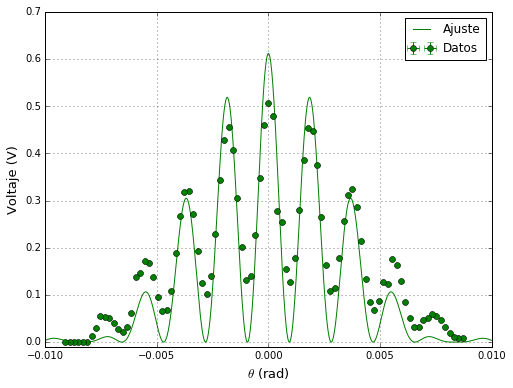

In [14]:
# Visualizamos los datos
fig=plt.figure(figsize=(8,6))
thetaajuste=np.linspace(-0.01,0.01,1000)
ajuste=I_doble(thetaajuste,i0_opt)
plt.plot(thetaajuste,ajuste,c='green',label='Ajuste')
plt.errorbar(data1['Theta (rad)'],data1['Voltaje (V)'],xerr=dtheta,yerr=dv,fmt='o',c='green',label='Datos')
plt.xlim(-0.01,0.01)
plt.ylim(-0.01,0.7)
plt.xlabel(r'$\theta$ (rad)',fontsize=13)
plt.ylabel('Voltaje (V)',fontsize=13)
plt.legend()
plt.grid()
plt.show()